In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import pandas as pd
import matplotlib.pyplot as plt
MM = np.array((0,0,.2,.2,.2,.2,.2,.2,.4,.4,1.3,1.3,3.6,3.6,8,8))  ## mortality per 100

In [3]:
## population and age classes
M=16  ## number of age classes

my_data = np.genfromtxt('data/age_structures/India-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni=aM+aF;   Ni=Ni[0:M];  N=np.sum(Ni)

In [4]:
# contact matrices
my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_home_1.xlsx', sheet_name='India',index_col=None)
CH = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_work_1.xlsx', sheet_name='India',index_col=None)
CW = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_school_1.xlsx', sheet_name='India',index_col=None)
CS = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_other_locations_1.xlsx', sheet_name='India',index_col=None)
CO = np.array(my_data)

my_data = pd.read_excel('data/contact_matrices_152_countries/MUestimates_all_locations_1.xlsx', sheet_name='India',index_col=None)
CA = np.array(my_data)

### One closures

In [5]:
# epidemic parameters
# epidemic parameters
alpha = 0.              # asymptomatic fraction
beta  = 0.0158          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<i<98:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  

# initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)

# start simulation
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)
Nf=8000; filename='this.mat'
model.simulate(CTS, Nf, filename)

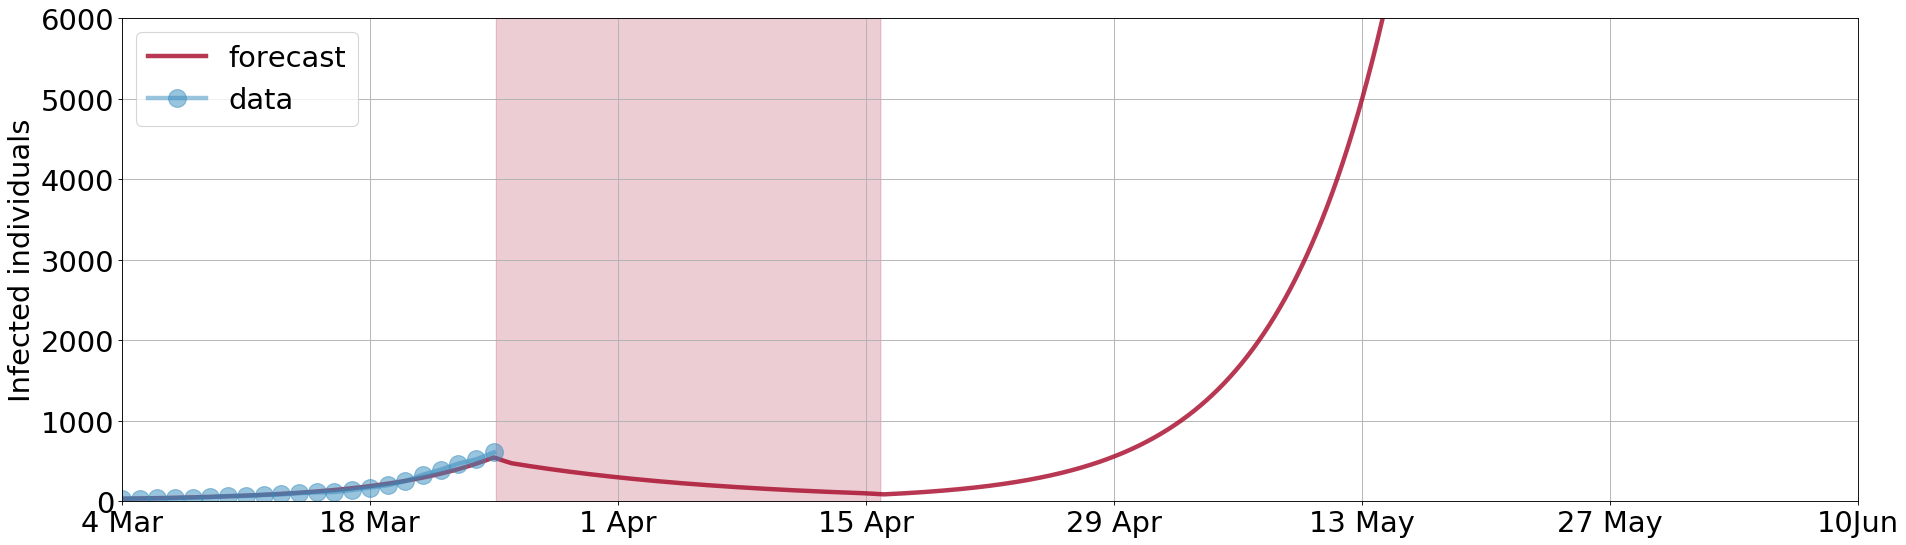

In [6]:
from scipy.io import loadmat
data=loadmat(filename)
IC  = np.zeros((Nf))
for i in range(M):
        IC += data['X'][:,2*M+i] 
t = data['t'][0]
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));
t1=int(Nf/14)
plt.fill_between(t[3*t1+10:6*t1+70], 0, 700, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals'); plt.ylim(0, 700); plt.xlim(0, 98);
#plt.savefig('/Users/rsingh/Desktop/4a.png', format='png', dpi=200)

In [7]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

2727.6431862140444

### Two closures

In [19]:
# epidemic parameters
alpha = 0.              # asymptomatic fraction
beta  = 0.0158          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<=i<47:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 47<=i<75:
        CTS[i, :] = (CH).reshape(M*M)
    elif 75<=i:#<80:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    #elif 82<=i<96:
    #    CTS[i, :] = (CH).reshape(M*M)

#initial conditions
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)

# start simulation
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)
Nf=8000; filename='this.mat'
model.simulate(CTS, Nf, filename)

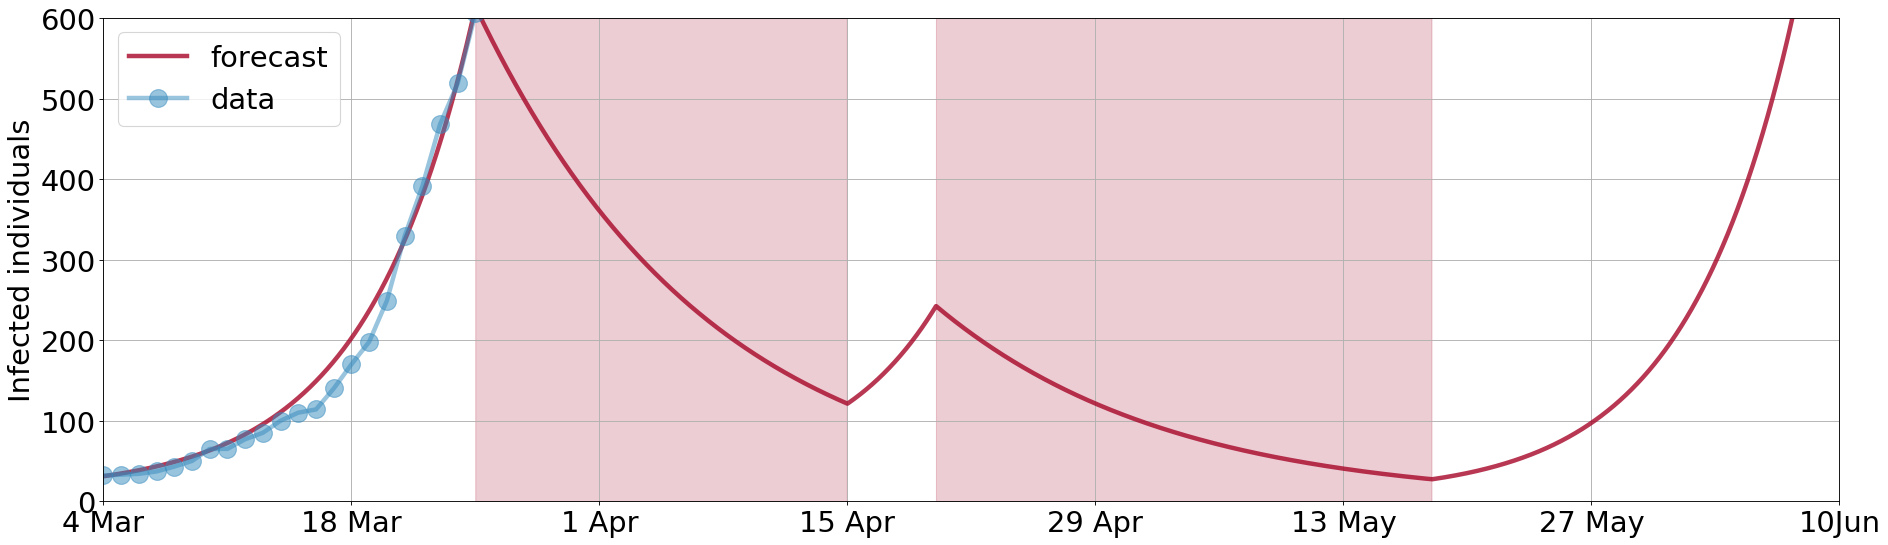

In [20]:
from scipy.io import loadmat
data=loadmat(filename)

t = data['t'][0]; IC  = np.zeros((Nf))
for i in range(M):
    IC += data['X'][:,2*M+i] 

fig=plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));

t1=int(Nf/(14))
plt.fill_between(t[3*t1:6*t1], 0, 700, color="#A60628", alpha=0.2)
plt.fill_between(t[6*t1+410:10*t1+410], 0, 700, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals'); plt.xlim(0, 98); plt.ylim(0, 700);
#plt.savefig('/Users/rsingh/Desktop/4b.png', format='png', dpi=200)

In [21]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

14.38501403029263

### Three closures

In [23]:
# epidemic parameters
alpha = 0.              # asymptomatic fraction
beta  = 0.0158          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics


Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<=i<47:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 47<=i<75:
        CTS[i, :] = (CH).reshape(M*M)
    elif 75<=i<80:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 80<=i<98:
        CTS[i, :] = (CH).reshape(M*M)

# initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)

# start simulation
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)
Nf=8000; filename='this.mat'
model.simulate(CTS, Nf, filename)

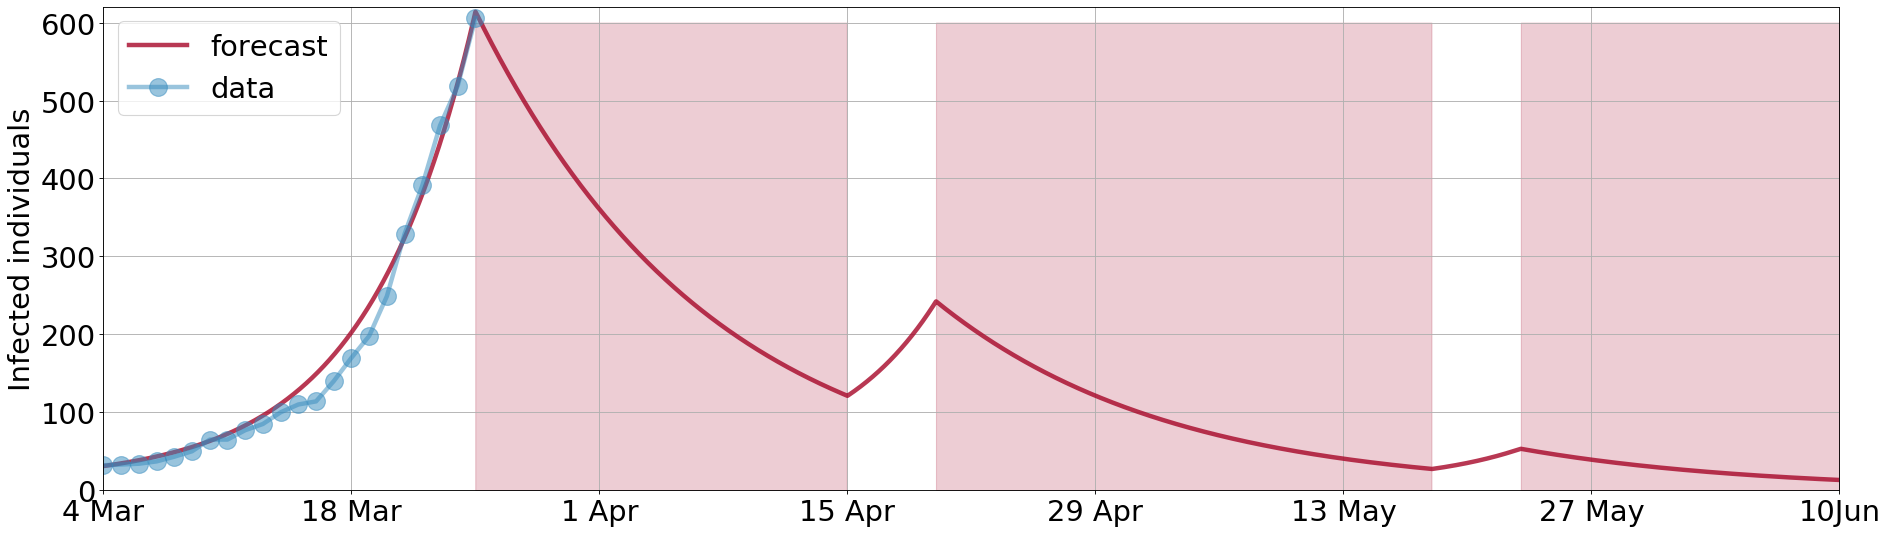

In [27]:
from scipy.io import loadmat
data=loadmat(filename)

IC  = np.zeros((Nf))

for i in range(M):
        IC += data['X'][:,2*M+i] 
                
t = data['t'][0]
      
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));

t1=int(Nf/(14))
plt.fill_between(t[3*t1:6*t1], 0, 700, color="#A60628", alpha=0.2)
plt.fill_between(t[6*t1+410:10*t1+410], 0, 700, color="#A60628", alpha=0.2)
plt.fill_between(t[11*t1+250:14*t1+410], 0, 700, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals'); plt.ylim(0, 700); plt.xlim(0, 98);
#plt.savefig('/Users/rsingh/Desktop/4c.png', format='png', dpi=200)
#IC[-1]

In [28]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

8.908195998467505

In [38]:
# epidemic parameters
alpha = 0.              # asymptomatic fraction
beta  = 0.0158          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

Tf=84; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<70:
        CTS[i, :] = (CH).reshape(M*M)
    if 70<=i<98:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)

# initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)

# start simulation
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)
Nf=8000; filename='this.mat'
model.simulate(CTS, Nf, filename)

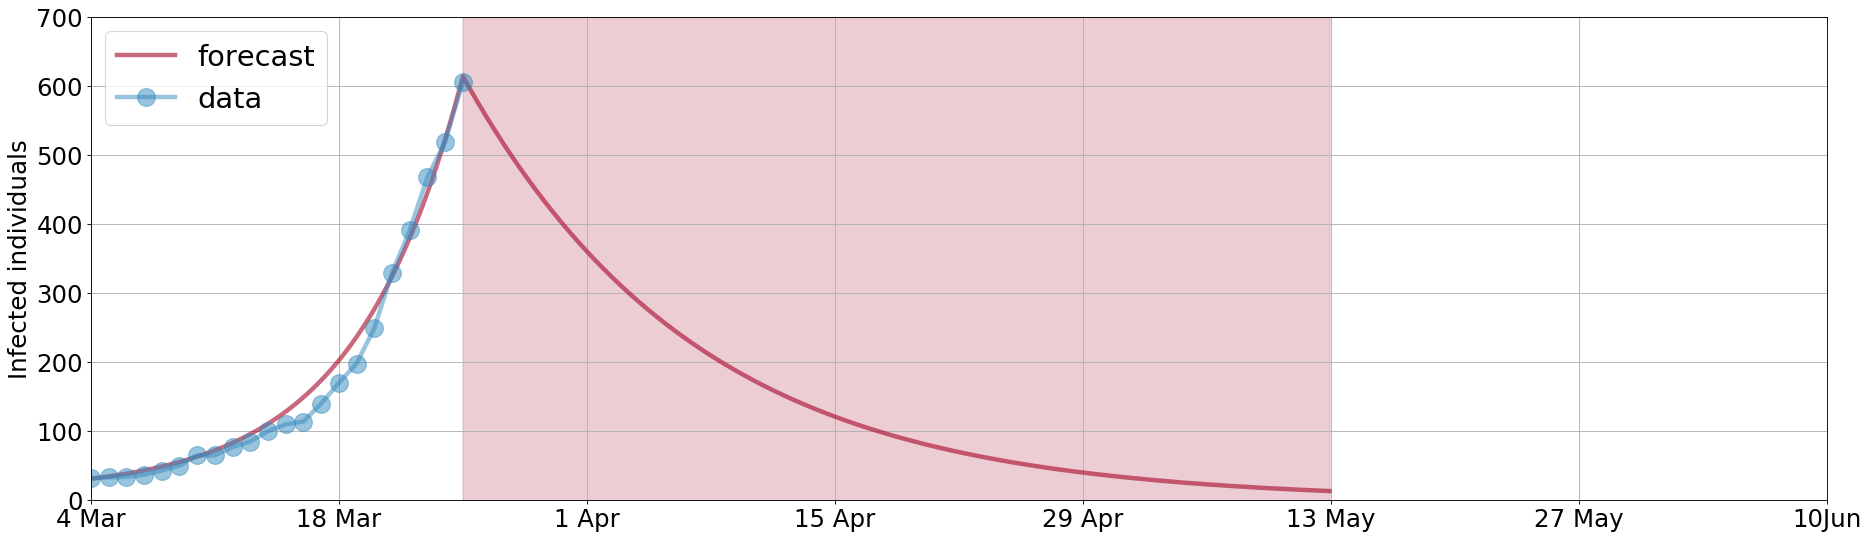

In [42]:
from scipy.io import loadmat
data=loadmat(filename)
IC  = np.zeros((Nf))
for i in range(M):
        IC += data['X'][:,2*M+i] 
t = data['t'][0]; t1=int(Nf/(12))
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t[0:10*t1], IC[0:10*t1], '-', lw=4, color='#A60628', label='forecast', alpha=0.6)

#plt.plot(t[10*t1:], IC[10*t1:], ':', lw=4, color='dimgrey', alpha=0.8)

plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));

plt.fill_between(t[3*t1:10*t1], 0, 700, color="#A60628", alpha=0.2)
#plt.fill_between(t[10*t1+10:14*t1+70], 0, 600, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals'); plt.ylim(0, 700); plt.xlim(0, 98);
#plt.savefig('/Users/rsingh/Desktop/4d.png', format='png', dpi=200)
#IC[-1]

In [37]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

7.325347043424846